# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Explore-training-data" data-toc-modified-id="Explore-training-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explore training data</a></div><div class="lev2 toc-item"><a href="#Common-values" data-toc-modified-id="Common-values-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Common values</a></div><div class="lev2 toc-item"><a href="#Aggregate-by-traps" data-toc-modified-id="Aggregate-by-traps-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Aggregate by traps</a></div><div class="lev2 toc-item"><a href="#Lat/Lon" data-toc-modified-id="Lat/Lon-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Lat/Lon</a></div><div class="lev1 toc-item"><a href="#Explore-weather" data-toc-modified-id="Explore-weather-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explore weather</a></div><div class="lev1 toc-item"><a href="#Explore-spray" data-toc-modified-id="Explore-spray-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore spray</a></div>

In [1]:
%matplotlib inline

/Users/shajek/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

Establish database connection

In [3]:
%run db.ipynb

In [4]:
rawconn = engine.raw_connection()

In [5]:
type(rawconn.connection)

psycopg2.extensions.connection

In [6]:
conn = rawconn.connection

In [7]:
%config SQL.conn_name = 'conn'

Show available tables in the 'wnv' schema

In [8]:
%%read_sql
select * from information_schema.tables
where table_schema = 'wnv'

Query started at 12:22:37 PM EDT
Query executed in 0.00 m


,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,gpadmin,wnv,wnv_train,BASE TABLE,None,None,None,None,None,YES,NO,None
1,gpadmin,wnv,wnv_weather,BASE TABLE,None,None,None,None,None,YES,NO,None
2,gpadmin,wnv,wnv_spray,BASE TABLE,None,None,None,None,None,YES,NO,None


# Explore training data

Explore contents of core training data (in `wnv_train` table)

Show Columns and their data types

In [9]:
%%read_sql

select table_schema, table_name, column_name, ordinal_position, 
    data_type
from information_schema.columns 
where table_schema = 'wnv'
    and table_name = 'wnv_train'
order by ordinal_position;

Query started at 12:22:45 PM EDT
Query executed in 0.00 m


,table_schema,table_name,column_name,ordinal_position,data_type
0,wnv,wnv_train,date,1,text
1,wnv,wnv_train,address,2,text
2,wnv,wnv_train,species,3,text
3,wnv,wnv_train,block,4,bigint
4,wnv,wnv_train,street,5,text
5,wnv,wnv_train,trap,6,text
6,wnv,wnv_train,addressnumberandstreet,7,text
7,wnv,wnv_train,latitude,8,double precision
8,wnv,wnv_train,longitude,9,double precision
9,wnv,wnv_train,addressaccuracy,10,bigint


In [10]:
%read_sql select * from wnv.wnv_train limit 3;

Query started at 12:22:47 PM EDT
Query executed in 0.00 m


,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


In [11]:
%%read_sql
DROP TABLE IF EXISTS wnv.wnv_train_summary;
select madlib.summary('wnv.wnv_train', 'wnv.wnv_train_summary');

Query started at 12:22:49 PM EDT
Query executed in 0.00 m


Query started at 12:22:49 PM EDT
Query executed in 0.02 m


,summary
0,"(wnv.wnv_train_summary,12,1.00079703331)"


In [24]:
%%read_sql wnv_summary
select * from wnv.wnv_train_summary order by column_number;

Query started at 01:58:26 PM EDT
Query executed in 0.00 m


,group_by,group_by_value,target_column,column_number,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,None,None,date,1,text,10506,95,0,0.0,0.0,0.0,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,"[2007-08-01, 2007-08-15, 2013-08-01, 2007-08-2...","[551, 276, 186, 186, 186, 185, 184, 182, 182, ..."
1,None,None,address,2,text,10506,138,0,0.0,0.0,0.0,NaN,NaN,16.000000,89.000000,NaN,NaN,NaN,"[ORD Terminal 5, O'Hare International Airport,...","[750, 750, 542, 542, 314, 314, 185, 185, 183, ..."
2,None,None,species,3,text,10506,7,0,0.0,0.0,0.0,NaN,NaN,13.000000,22.000000,NaN,NaN,NaN,"[CULEX PIPIENS/RESTUANS, CULEX PIPIENS/RESTUAN...","[4752, 4752, 2740, 2740, 2699, 2699, 222, 222,..."
3,None,None,block,4,int8,10506,64,0,NaN,0.0,NaN,35.687797,592.409707,10.000000,98.000000,12.000000,33.000000,52.000000,"[10, 10, 11, 11, 12, 12, 22, 22, 13, 13]","[1722, 1722, 736, 736, 605, 605, 500, 500, 345..."
4,None,None,street,5,text,10506,128,0,0.0,0.0,0.0,NaN,NaN,8.000000,30.000000,NaN,NaN,NaN,"[ W OHARE AIRPORT, W OHARE AIRPORT, S DOTY A...","[750, 750, 542, 542, 347, 347, 266, 266, 216, ..."
5,None,None,trap,6,text,10506,136,0,0.0,0.0,0.0,NaN,NaN,4.000000,5.000000,NaN,NaN,NaN,"[T900, T900, T115, T115, T138, T138, T002, T00...","[750, 750, 542, 542, 314, 314, 185, 185, 183, ..."
6,None,None,addressnumberandstreet,7,text,10506,138,0,0.0,0.0,0.0,NaN,NaN,26.000000,48.000000,NaN,NaN,NaN,"[1000 W OHARE AIRPORT, Chicago, IL, 1000 W O...","[750, 750, 542, 542, 314, 314, 185, 185, 183, ..."
7,None,None,latitude,8,float8,10506,138,0,NaN,0.0,NaN,41.841139,0.012711,41.644612,42.017430,41.732984,41.846283,41.954690,"[41.974689, 41.974689, 41.673408, 41.673408, 4...","[750, 750, 542, 542, 314, 314, 185, 185, 183, ..."
8,None,None,longitude,9,float8,10506,138,0,NaN,0.0,NaN,-87.699908,0.009315,-87.930995,-87.531635,-87.760070,-87.694991,-87.627796,"[-87.890615, -87.890615, -87.599862, -87.59986...","[750, 750, 542, 542, 314, 314, 185, 185, 183, ..."
9,None,None,addressaccuracy,10,int8,10506,4,0,NaN,0.0,NaN,7.819532,2.110979,3.000000,9.000000,8.000000,8.000000,9.000000,"[8, 8, 9, 9, 5, 5, 3, 3]","[4628, 4628, 3980, 3980, 1807, 1807, 91, 91]"


In [25]:
wnv_summary.target_column

0                       date
1                    address
2                    species
3                      block
4                     street
5                       trap
6     addressnumberandstreet
7                   latitude
8                  longitude
9            addressaccuracy
10              nummosquitos
11                wnvpresent
Name: target_column, dtype: object

In [26]:
', '.join(wnv_summary.target_column)

u'date, address, species, block, street, trap, addressnumberandstreet, latitude, longitude, addressaccuracy, nummosquitos, wnvpresent'

## Common values

In [13]:
%%read_sql
select species, count(*) n 
from wnv.wnv_train 
group by species
order by n desc;

Query started at 12:23:09 PM EDT
Query executed in 0.00 m


,species,n
0,CULEX PIPIENS/RESTUANS,4752
1,CULEX RESTUANS,2740
2,CULEX PIPIENS,2699
3,CULEX TERRITANS,222
4,CULEX SALINARIUS,86
5,CULEX TARSALIS,6
6,CULEX ERRATICUS,1


In [14]:
%%read_sql
select addressaccuracy, count(*) n 
from wnv.wnv_train 
group by addressaccuracy
order by addressaccuracy;

Query started at 12:23:16 PM EDT
Query executed in 0.00 m


,addressaccuracy,n
0,3,91
1,5,1807
2,8,4628
3,9,3980


What does `addressaccuracy` mean?

In [15]:
%%read_sql
select block, count(*) n 
from wnv.wnv_train 
group by block
order by block;

Query started at 12:23:25 PM EDT
Query executed in 0.00 m


,block,n
0,10,1722
1,11,736
2,12,605
3,13,345
4,14,97
5,15,90
6,17,305
7,18,43
8,20,25
9,21,49


In [16]:
%%read_sql
select trap, count(*) n 
from wnv.wnv_train 
group by trap
order by n desc;

Query started at 12:23:26 PM EDT
Query executed in 0.00 m


,trap,n
0,T900,750
1,T115,542
2,T138,314
3,T002,185
4,T135,183
5,T054,163
6,T128,160
7,T151,156
8,T212,152
9,T090,151


In [17]:
%%read_sql
select wnvpresent, count(*) n 
from wnv.wnv_train 
group by wnvpresent
order by wnvpresent;

Query started at 12:23:29 PM EDT
Query executed in 0.00 m


,wnvpresent,n
0,0,9955
1,1,551


In [18]:
%%read_sql nmosq
select nummosquitos, count(*) n 
from wnv.wnv_train 
group by nummosquitos
order by nummosquitos;

Query started at 12:23:36 PM EDT
Query executed in 0.00 m


,nummosquitos,n
0,1,2307
1,2,1300
2,3,896
3,4,593
4,5,489
5,6,398
6,7,326
7,8,244
8,9,237
9,10,206


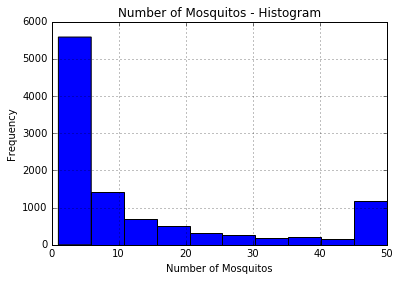

In [21]:
nmosq.nummosquitos.hist(weights=nmosq.n)
plt.title('Number of Mosquitos - Histogram')
plt.xlabel('Number of Mosquitos')
plt.ylabel('Frequency')

## Aggregate by traps

Does "trap" uniquely identify an address, etc?

In [32]:
%%read_sql
drop table if exists group_all;
create temporary table group_all
as (
    select
        "date", 
        address, 
        species, 
        block, 
        street, 
        trap, 
        addressnumberandstreet, 
        latitude, longitude
    from wnv.wnv_train
    group by 
        "date", 
        address, 
        species, 
        block, 
        street, 
        trap, 
        addressnumberandstreet, 
        latitude, longitude
)

Query started at 02:06:39 PM EDT
Query executed in 0.00 m


Query started at 02:06:39 PM EDT
Query executed in 0.01 m


In [39]:
%read_sql select count(*) from group_all;

Query started at 03:14:58 PM EDT
Query executed in 0.00 m


,count
0,8475


In [33]:
%%read_sql
drop table if exists group_drop_species;
create temporary table group_drop_species
as (
    select
        "date", 
        address, 
        block, 
        street, 
        trap, 
        addressnumberandstreet, 
        latitude, longitude,
        count(*) n_species,
        count(distinct species) as n_distinct_species
    from group_all
    group by 
        "date", 
        address, 
        block, 
        street, 
        trap, 
        addressnumberandstreet, 
        latitude, longitude
)

Query started at 02:08:10 PM EDT
Query executed in 0.00 m


Query started at 02:08:10 PM EDT
Query executed in 0.01 m


In [34]:
%%read_sql
select count(*) from group_drop_species;

Query started at 02:08:30 PM EDT
Query executed in 0.00 m


,count
0,4616


In [35]:
%%read_sql
select n_species, n_distinct_species, count(*) as freq
from group_drop_species
group by n_species, n_distinct_species
;

Query started at 02:09:16 PM EDT
Query executed in 0.00 m


,n_species,n_distinct_species,freq
0,4,4,75
1,1,1,1710
2,2,2,2038
3,3,3,788
4,5,5,5


In [38]:
%%read_sql
select "date", trap, count(*) as n
from group_drop_species
group by "date", trap
order by n desc
limit 5;

Query started at 02:18:19 PM EDT
Query executed in 0.00 m


,date,trap,n
0,2007-08-22,T107,1
1,2009-08-13,T066,1
2,2013-09-06,T077,1
3,2009-06-19,T054,1
4,2013-07-19,T094B,1


So when you group by all the fields except mosquito counts and species, then you get only a single record per date/trap combination. 

<mark style="background-color: yellow">Next steps:</mark>  
1. Group by date, trap, and species.  
2. Aggregate mosquito counts.  
3. Pivot species.  

In [ ]:
## UNFINISHED
%%read_sql
select sugarlib.sugar($$
    create temporary table pivot_species as
        select 
            "date", trap,
            sugarlib.pivot(species, group)
        from group_all
        group by "date", trap
$$);

## Lat/Lon

In [51]:
%%read_sql latlon_full
select latitude, longitude from wnv.wnv_train;

Query started at 06:23:34 PM EDT
Query executed in 0.00 m


,latitude,longitude
0,41.954690,-87.800991
1,41.954690,-87.800991
2,41.994991,-87.769279
3,41.974089,-87.824812
4,41.974089,-87.824812
5,41.921600,-87.666455
6,41.891118,-87.654491
7,41.867108,-87.654224
8,41.867108,-87.654224
9,41.896282,-87.655232


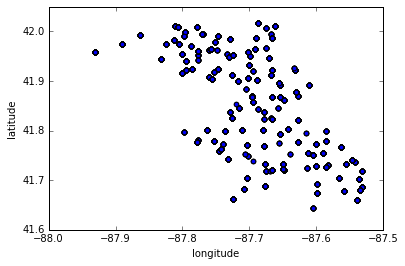

In [62]:
latlon_full.plot(x='longitude', y='latitude', kind='scatter')

In [63]:
import gmplot

In [76]:
gmap = gmplot.GoogleMapPlotter(
    latlon_full.latitude.mean(), 
    latlon_full.longitude.mean(), 
    zoom=16
)

In [77]:
gmap.heatmap(latlon_full.latitude, latlon_full.longitude)

In [74]:
gmap.scatter(latlon_full.latitude, latlon_full.longitude, 'k', marker=True)

In [66]:
import io

In [69]:
s = io.BytesIO()
gmap.write_heatmap(s)

In [70]:
s.getvalue()

"var heatmap_points = [\nnew google.maps.LatLng(41.954690, -87.800991),\nnew google.maps.LatLng(41.954690, -87.800991),\nnew google.maps.LatLng(41.994991, -87.769279),\nnew google.maps.LatLng(41.974089, -87.824812),\nnew google.maps.LatLng(41.974089, -87.824812),\nnew google.maps.LatLng(41.921600, -87.666455),\nnew google.maps.LatLng(41.891118, -87.654491),\nnew google.maps.LatLng(41.867108, -87.654224),\nnew google.maps.LatLng(41.867108, -87.654224),\nnew google.maps.LatLng(41.896282, -87.655232),\nnew google.maps.LatLng(41.919343, -87.694259),\nnew google.maps.LatLng(41.921965, -87.632085),\nnew google.maps.LatLng(41.921965, -87.632085),\nnew google.maps.LatLng(41.688324, -87.676709),\nnew google.maps.LatLng(41.688324, -87.676709),\nnew google.maps.LatLng(41.862292, -87.648860),\nnew google.maps.LatLng(41.720848, -87.666014),\nnew google.maps.LatLng(41.731922, -87.677512),\nnew google.maps.LatLng(41.731922, -87.677512),\nnew google.maps.LatLng(41.891126, -87.611560),\nnew google.maps

In [78]:
gmap.draw('collection.html')

Plot maps using Basemap

To install

    conda install basemap

In [81]:
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
bmap = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')


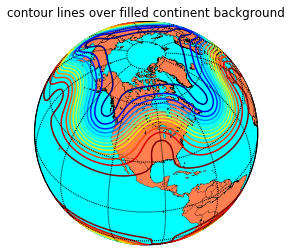

In [88]:
# draw coastlines, country boundaries, fill continents.
bmap.drawcoastlines(linewidth=0.25)
bmap.drawcountries(linewidth=0.25)
bmap.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
bmap.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
bmap.drawmeridians(np.arange(0,360,30))
bmap.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = bmap(lons*180./np.pi, lats*180./np.pi)
# contour data over the bmap.
cs = bmap.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()

# Explore weather

TODO:

* explore as time series
* aggregate (in-database) by day to plot time series (as if it were a large data set)
* 

In [54]:
%%read_sql

select table_schema, table_name, column_name, ordinal_position, 
    data_type
from information_schema.columns 
where table_schema = 'wnv'
    and table_name = 'wnv_weather'
order by ordinal_position;

Query started at 04:01:31 PM EDT
Query executed in 0.00 m


,table_schema,table_name,column_name,ordinal_position,data_type
0,wnv,wnv_weather,station,1,bigint
1,wnv,wnv_weather,date,2,text
2,wnv,wnv_weather,tmax,3,bigint
3,wnv,wnv_weather,tmin,4,bigint
4,wnv,wnv_weather,tavg,5,text
5,wnv,wnv_weather,depart,6,text
6,wnv,wnv_weather,dewpoint,7,bigint
7,wnv,wnv_weather,wetbulb,8,text
8,wnv,wnv_weather,heat,9,text
9,wnv,wnv_weather,cool,10,text


In [55]:
%read_sql select * from wnv.wnv_weather limit 3;

Query started at 04:03:42 PM EDT
Query executed in 0.00 m


,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2


In [56]:
%%read_sql
DROP TABLE IF EXISTS wnv.wnv_weather_summary;
select madlib.summary('wnv.wnv_weather', 'wnv.wnv_weather_summary');

Query started at 04:04:16 PM EDT
Query executed in 0.00 m


Query started at 04:04:16 PM EDT
Query executed in 0.01 m


,summary
0,"(wnv.wnv_weather_summary,22,0.473247051239)"


In [57]:
%%read_sql weather_summary
select * from wnv.wnv_weather_summary order by column_number;

Query started at 04:05:21 PM EDT
Query executed in 0.00 m


,group_by,group_by_value,target_column,column_number,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,None,None,station,1,int8,2944,2,0,NaN,0.0,NaN,1.500000,0.250085,1.0,2.0,1.0,1.5,2.0,"[2, 1]","[1472, 1472]"
1,None,None,date,2,text,2944,1472,0,0.0,0.0,0.000000,NaN,NaN,10.0,10.0,NaN,NaN,NaN,"[2010-09-15, 2011-05-11, 2012-08-17, 2012-09-0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]"
2,None,None,tmax,3,int8,2944,63,0,NaN,0.0,NaN,76.166101,131.376751,41.0,104.0,69.0,78.0,85.0,"[84, 84, 79, 79, 82, 82, 81, 81, 83, 83]","[128, 128, 121, 121, 118, 118, 117, 117, 109, ..."
3,None,None,tmin,4,int8,2944,54,0,NaN,0.0,NaN,57.810462,107.784654,29.0,83.0,50.0,59.0,66.0,"[63, 63, 65, 65, 60, 61, 61, 62, 62, 57]","[121, 121, 111, 111, 109, 106, 106, 105, 105, ..."
4,None,None,tavg,5,text,2944,60,0,0.0,0.0,0.000000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,"[73, 73, 70, 77, 77, 70, 75, 75, 71, 74]","[138, 138, 117, 117, 117, 117, 110, 110, 109, ..."
5,None,None,depart,6,text,2944,42,0,0.0,0.0,0.000000,NaN,NaN,1.0,3.0,NaN,NaN,NaN,"[M, 2, -1, -2, 5, 7, 1, 3, 0, -3]","[1472, 93, 84, 80, 77, 76, 76, 75, 74, 72]"
6,None,None,dewpoint,7,int8,2944,54,0,NaN,0.0,NaN,53.457880,113.959489,22.0,75.0,46.0,54.0,62.0,"[59, 59, 54, 54, 55, 55, 60, 60, 61, 61]","[128, 128, 125, 125, 114, 114, 113, 113, 110, ..."
7,None,None,wetbulb,8,text,2944,48,0,0.0,0.0,0.000000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,"[63, 63, 65, 65, 59, 59, 61, 61, 64, 64]","[135, 135, 131, 131, 129, 129, 123, 123, 121, ..."
8,None,None,heat,9,text,2944,31,0,0.0,0.0,0.000000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,"[0, 0, 4, 4, 1, 1, 2, 2, 8, 8]","[1870, 1870, 88, 88, 86, 86, 81, 81, 67, 67]"
9,None,None,cool,10,text,2944,31,0,0.0,0.0,0.000000,NaN,NaN,1.0,2.0,NaN,NaN,NaN,"[ 0, 0, 8, 8, 12, 5, 5, 12, 10, 10]","[1147, 1147, 138, 138, 117, 117, 117, 117, 110..."


<mark>sunrise</mark>, <mark>sunset</mark>, and <mark>codesum</mark> all have blank values

# Explore spray

In [58]:
%%read_sql

select table_schema, table_name, column_name, ordinal_position, 
    data_type
from information_schema.columns 
where table_schema = 'wnv'
    and table_name = 'wnv_spray'
order by ordinal_position;

Query started at 04:17:16 PM EDT
Query executed in 0.00 m


,table_schema,table_name,column_name,ordinal_position,data_type
0,wnv,wnv_spray,date,1,text
1,wnv,wnv_spray,time,2,text
2,wnv,wnv_spray,latitude,3,double precision
3,wnv,wnv_spray,longitude,4,double precision


In [59]:
%read_sql select * from wnv.wnv_spray limit 3;

Query started at 04:17:40 PM EDT
Query executed in 0.00 m


,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [60]:
%%read_sql
DROP TABLE IF EXISTS wnv.wnv_spray_summary;
select madlib.summary('wnv.wnv_spray', 'wnv.wnv_spray_summary');

Query started at 04:18:18 PM EDT
Query executed in 0.00 m


Query started at 04:18:18 PM EDT
Query executed in 0.02 m


,summary
0,"(wnv.wnv_spray_summary,4,1.0604801178)"


In [61]:
%%read_sql spray_summary
select * from wnv.wnv_spray_summary order by column_number;

Query started at 04:21:27 PM EDT
Query executed in 0.00 m


,group_by,group_by_value,target_column,column_number,data_type,row_count,distinct_values,missing_values,blank_values,fraction_missing,fraction_blank,mean,variance,min,max,first_quartile,median,third_quartile,most_frequent_values,mfv_frequencies
0,None,None,date,1,text,14835,10,0,0.0,0.000000,0.0,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,"[2013-08-15, 2013-08-29, 2013-07-17, 2011-09-0...","[2668, 2302, 2202, 2114, 1607, 1587, 1195, 924..."
1,None,None,"""time""",2,text,14835,8583,584,0.0,0.039366,0.0,NaN,NaN,10.000000,11.000000,NaN,NaN,NaN,"[7:44:32 PM, 9:49:45 PM, 8:27:31 PM, 8:09:26 P...","[550, 20, 16, 16, 14, 14, 14, 14, 13, 13]"
2,None,None,latitude,3,float8,14835,12871,0,NaN,0.000000,NaN,41.904828,0.010895,41.713925,42.395983,41.785001,41.940075,41.980978,"[41.98646, 41.7797466666667, 41.9953963549253,...","[550, 17, 17, 17, 15, 14, 13, 13, 13, 13]"
3,None,None,longitude,4,float8,14835,13296,0,NaN,0.000000,NaN,-87.736690,0.004528,-88.096468,-87.586727,-87.794225,-87.727853,-87.694108,"[-87.794225, -87.8145016666667, -87.8118766666...","[550, 16, 15, 14, 14, 14, 14, 13, 13, 13]"


<span style="color: red">time</span> has ~ 7% missing values